# TP1

## About Dataset:
This dataset contains accelerometer and gyroscope readings gathered from participants performing a variety of exercises. It includes sensor data from the accelerometer (x, y, z
axes) and gyroscope (x, y, z axes) across different exercise types and intensities. This data
is well-suited for analyzing movement patterns, developing activity recognition models,
and training machine learning algorithms for fitness and health monitoring.

● ep (ms): Timestamp in milliseconds, representing the exact recording time.

● Acc_x: X-axis acceleration value from the fitness tracker.

● Acc_y: Y-axis acceleration value from the fitness tracker.

● Acc_z: Z-axis acceleration value from the fitness tracker.

● Gyro_x: X-axis rotational velocity (gyroscope) reading.

● Gyro_y: Y-axis rotational velocity (gyroscope) reading.

● Gyro_z: Z-axis rotational velocity (gyroscope) reading.

● ID: Identifier for the individual performing the exercise.

● Exercise: Type of exercise or movement (e.g., bench press, overhead press).

● Category: Intensity of the exercise (e.g., heavy, medium).

● Set: Set number or batch identifier for the recorded session.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter




 1- Write a function to load the dataset.



In [2]:
def load(path):
 data = pd.read_csv(path, delimiter=';')
 
 return data
data=load("DatasetExos.csv")

2- Write a function to display basic information about the dataset.


In [3]:
def info(data):
 print("\n info data:\n")
 print(data.info())
info(data)


 info data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9009 entries, 0 to 9008
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ep (ms)   8998 non-null   object 
 1   Acc_x     9006 non-null   object 
 2   Acc_y     9007 non-null   object 
 3   Acc_z     9006 non-null   object 
 4   Gyro_x    9008 non-null   object 
 5   Gyro_y    9009 non-null   object 
 6   Gyro_z    9008 non-null   object 
 7   ID        9007 non-null   object 
 8   Label     9009 non-null   object 
 9   Category  9005 non-null   object 
 10  Set       9003 non-null   float64
dtypes: float64(1), object(10)
memory usage: 774.3+ KB
None


convert the columns into thee type 

In [ ]:
data['ep (ms)'] = pd.to_datetime(data['ep (ms)'])
data['Acc_x'] = pd.to_numeric(data['Acc_x'], errors='coerce') 
data['Acc_y'] = pd.to_numeric(data['Acc_y'], errors='coerce')  
data['Acc_z'] = pd.to_numeric(data['Acc_z'], errors='coerce')  
data['Gyro_x'] = pd.to_numeric(data['Gyro_x'], errors='coerce')  
data['Gyro_y'] = pd.to_numeric(data['Gyro_y'], errors='coerce')  
data['Gyro_z'] = pd.to_numeric(data['Gyro_z'], errors='coerce')  
data['ID'] = data['ID'].astype('category')  
data['Label'] = data['Label'].astype('category')  
data.rename(columns={'Label': 'Exercise', }, inplace=True)
data['Category'] = data['Category'].astype('category')  
data['Set'] = data['Set'].where(data['Set'] >= 0,0) 
data['Set'] = data['Set'].fillna(0)  
data['Set']= pd.to_numeric(data['Set'], errors='coerce') 
df['Exercise'] = df['Exercise'].replace({'reste': 'rest', 'raw': 'row'})
df['Category'] = df['Category'].replace({'heav': 'heavy'})


print(data.dtypes)

ep (ms)     datetime64[ns]
Acc_x              float64
Acc_y              float64
Acc_z              float64
Gyro_x             float64
Gyro_y             float64
Gyro_z             float64
ID                category
Exercise          category
Category          category
Set                float64
dtype: object


In [5]:
from collections import Counter

def  cal_mode(data):
    
    data.sort()

    freq_counter = Counter(data)
    data.sort()

  
    max_frequency = max(freq_counter.values())
    
    modes = [element for element, frequency in freq_counter.items() if frequency == max_frequency]
    
    return modes

def q(data, i):
    
    data.sort()
    if (i==1):
     
     return data[(len(data)//4)]
     
    else:
     return data[3*(len(data)//4)]
    
    

def cal_median(data):

   
    data.sort()

    
    n = len(data)
    middle = n // 2

    if n % 2 == 1:  
        return data[middle]
    else:  
        return (data[middle +1] + data[middle])/2


3- Write a function to calculate the central tendencies of an attribute.


In [6]:
def central_tendencies(att):
   
   mean=None
   median=None


   if( pd.api.types.is_float_dtype(att)):
      att = pd.to_numeric(att, errors='coerce')

      att = att.dropna()

      data = np.array(att)
     
      mean=np.mean(data)
      median=cal_median(data)
      mode= cal_mode(data)
      

   else:
      att = att.dropna()
      data = np.array(att)
      mode= cal_mode(data)

       
        
   return mean, median, mode




In [7]:
t = central_tendencies(data.iloc[1:, 2])  

mean, median, mode = t
print(t)
if(mean!=None):

 if mean == median == mode:
       print("Symmetrical: Mean ≈ Median ≈ Mode")
 elif mean > median > mode:
           print("Positively Skewed: Mean > Median > Mode")
 elif mean < median < mode:
            print("Negatively Skewed: Mean < Median < Mode")


(-0.14927537745289993, 0.6325000000000001, [0.969])
Negatively Skewed: Mean < Median < Mode


 4- Write a function to calculate the quartiles (Q0, Q1, Q2, Q3, Q4) of an attribute.

In [8]:
def  quartiles(att):
    # data = np.array(att)
   
    # data = pd.to_numeric(data, errors='coerce')
    att = pd.to_numeric(att, errors='coerce')

    att = att.dropna()



    data = np.array(att)

    Q0 = np.min(data)
    Q1 = q(data, 1)
    Q2 = cal_median(data)
    Q3 = q(data, 3)
    Q4 = np.max(data)
   
    
    return Q0 ,Q1, Q2, Q3, Q4 
   
     
     

In [9]:
Q0 ,Q1, Q2, Q3, Q4 =quartiles(data.iloc[1:,2])

print(Q0 ,Q1, Q2, Q3, Q4)

-15.455 -0.8605 0.6325000000000001 0.8706666666666667 16.205


## display the metrics using describe() function 

In [10]:
print(data.describe())
print(data.describe(include=['object', 'category']))

                             ep (ms)        Acc_x        Acc_y        Acc_z  \
count                           8998  8987.000000  7662.000000  8998.000000   
mean   2019-01-15 22:32:50.768993280     0.045905    -0.149128     0.107780   
min       2019-01-11 15:08:05.200000    -0.838000   -15.455000    -0.619333   
25%    2019-01-12 16:24:48.449999872    -0.111500    -0.860458    -0.125500   
50%       2019-01-15 19:26:39.300000     0.016000     0.632500    -0.031000   
75%    2019-01-18 17:22:57.550000128     0.117667     0.870667     0.335458   
max       2019-01-20 17:33:27.800000    10.255000    16.205000    10.175000   
std                              NaN     0.417235     3.156641     0.393080   

            Gyro_x       Gyro_y       Gyro_z          Set  
count  7400.000000  7053.000000  7260.000000  9009.000000  
mean      8.593767   -17.752270     6.677810    46.075924  
min    -837.074000  -995.854000  -988.294000     0.000000  
25%     -66.584500   -54.634000   -33.658000    

In [11]:

category_counts = data['Exercise'].value_counts(normalize=True)
print(category_counts)
category_counts = data['ID'].value_counts(normalize=True)
print(category_counts)
category_counts = data['Category'].value_counts(normalize=True)
print(category_counts)


Exercise
ohp      0.186036
bench    0.184815
squat    0.178710
dead     0.169941
row      0.157176
rest     0.123210
raw      0.000111
Name: proportion, dtype: float64
ID
A    0.331631
E    0.293549
C    0.164428
D    0.116687
B    0.093594
Z    0.000111
Name: proportion, dtype: float64
Category
medium      0.492726
heavy       0.384009
standing    0.066630
sitting     0.056635
Name: proportion, dtype: float64


5- Write a function to display the number and percentage of missing values for an attribute.


In [12]:
def missing_values(data):
    print("number missing values" ,data.isnull().sum())
    
    print("percentage missing values" , data.isnull().sum()*100/len(data), '%')

In [13]:
missing_values(data.iloc[1:,2])

number missing values 1347
percentage missing values 14.953374777975133 %


6- Write a function to display the number of unique values for an attribute.


In [14]:
def number_of_uniquevalues(data):
   print("\nnumber of uniquevalues\n")
   print(data.nunique())

In [15]:
number_of_uniquevalues(data)


number of uniquevalues

ep (ms)     8998
Acc_x       2754
Acc_y       3055
Acc_z       3280
Gyro_x      3936
Gyro_y      3256
Gyro_z      3576
ID             6
Exercise       7
Category       4
Set           93
dtype: int64


## tp2 

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


1- Write a function to generate a scatter plot for a pair of attributes.

In [17]:

# def scatter_plot(x, y, xlabel='X-Axis', ylabel='Y-Axis', title='Scatter Plot'):
#     plt.figure(figsize=(8, 6))
#     plt.scatter(x, y, color='blue', alpha=0.5)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(title)
#     plt.grid(True)
#     plt.show()
import numpy as np
import matplotlib.pyplot as plt

def remove_outliers(data, threshold=1.5):
    """
    Remove outliers based on the IQR method.
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

def scatter_plot(x, y, xlabel='X-Axis', ylabel='Y-Axis', title='Scatter Plot', threshold=0):
    # Remove outliers from both x and y
    x_no_outliers = remove_outliers(x, threshold)
    y_no_outliers = remove_outliers(y, threshold)
    print(x_no_outliers)
    print(  y_no_outliers)
    
    # Ensure the arrays are the same length after outlier removal
    min_length = min(len(x_no_outliers), len(y_no_outliers))
    x_no_outliers = x_no_outliers[:min_length]
    y_no_outliers = y_no_outliers[:min_length]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x_no_outliers, y_no_outliers, color='blue', alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Example usage:
# x and y should be numpy arrays or pandas Series
# scatter_plot(x, y, xlabel='X', ylabel='Y', title='Scatter Plot with Outliers Removed')



Series([], Name: Acc_y, dtype: float64)
Series([], Name: Acc_x, dtype: float64)


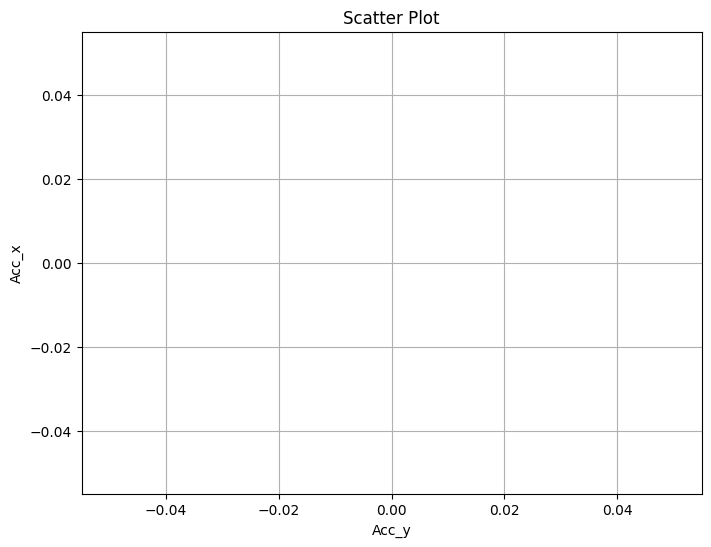

Series([], Name: Acc_z, dtype: float64)
Series([], Name: Acc_y, dtype: float64)


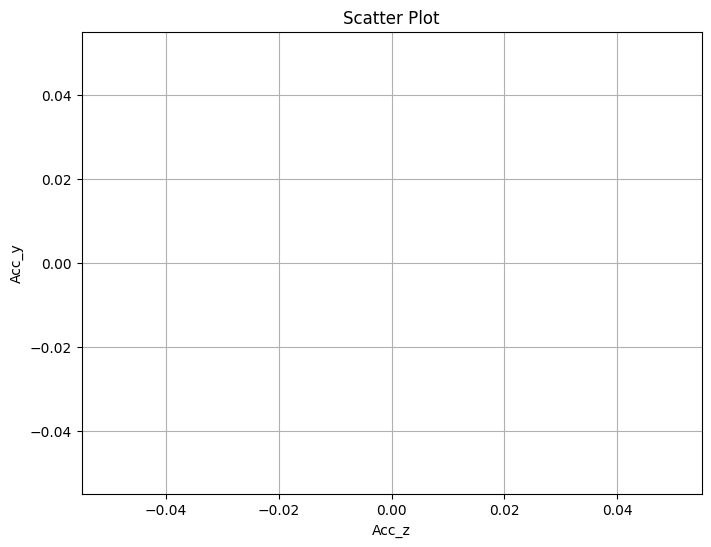

Series([], Name: Gyro_x, dtype: float64)
Series([], Name: Acc_z, dtype: float64)


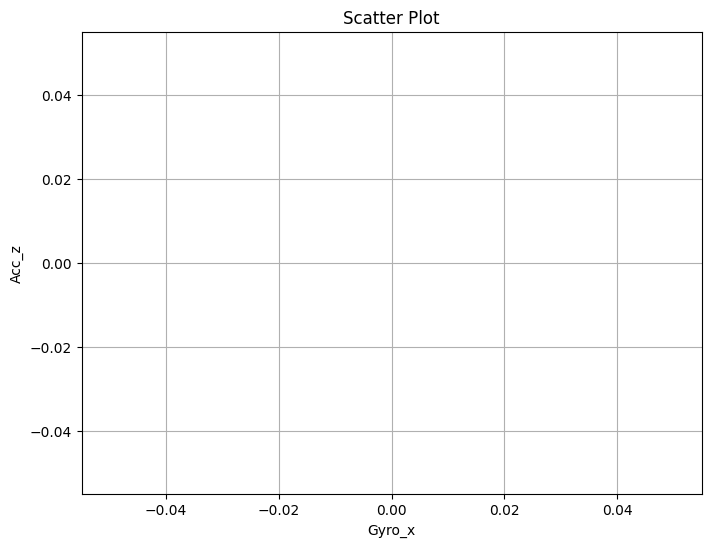

Series([], Name: Gyro_y, dtype: float64)
Series([], Name: Gyro_x, dtype: float64)


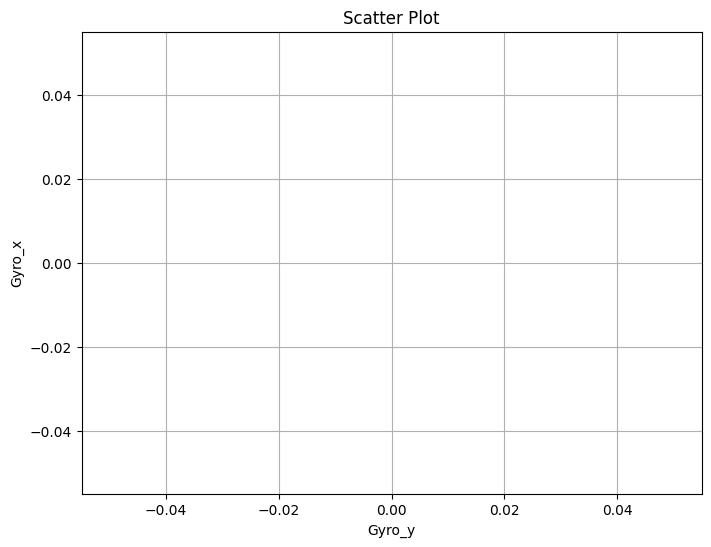

Series([], Name: Gyro_z, dtype: float64)
Series([], Name: Gyro_y, dtype: float64)


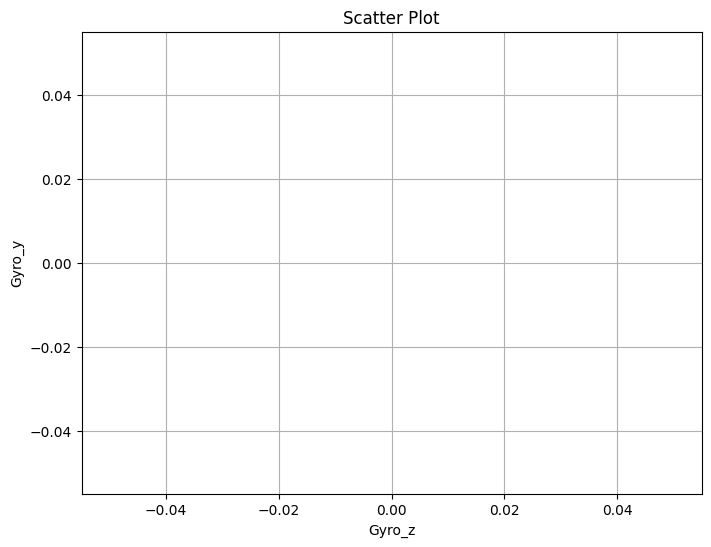

In [18]:
for i in range(len(data.columns)):
    
  scatter_plot( data.iloc[1:,i+2],data.iloc[1:,i+1], xlabel=data.columns[i+2], ylabel=data.columns[i+1 ], title='Scatter Plot')
  if i==4:
      break


2 -Write a function to generate a histogram (and Bar chart) for an attribute

In [19]:
def histogram_Bar_chart (data, bins=10, xlabel='Values', ylabel='Frequency', title='Histogram'):
    if (pd.api.types.is_float_dtype(data)):
     plt.figure(figsize=(8, 6))
     plt.hist(data, bins=bins, color='green', alpha=0.7)
     plt.xlabel(xlabel)
     plt.ylabel(ylabel)
     plt.title(title)
     plt.grid(True)
     plt.show()
     
     plt.figure(figsize=(8, 6))
    #  data= pd.DataFrame(data, columns=['category'])
    #  ax=sns.countplot(x='category', data=data)
     category_counts = data.value_counts()

     plt.bar(category_counts.index, category_counts.values)
     plt.title('bar ')
     plt.xlabel('Catégorie')
     plt.ylabel('Fréquence')
     
     plt.show()

     
    else:
     plt.figure(figsize=(8, 6))
    #  data= pd.DataFrame(data, columns=['category'])
    #  ax=sns.countplot(x='category', data=data)
     category_counts = data.value_counts()

     plt.bar(category_counts.index, category_counts.values)
     plt.title('Fréquence des catégories')
     plt.xlabel('Catégorie')
     plt.ylabel('Fréquence')
     
     plt.show()




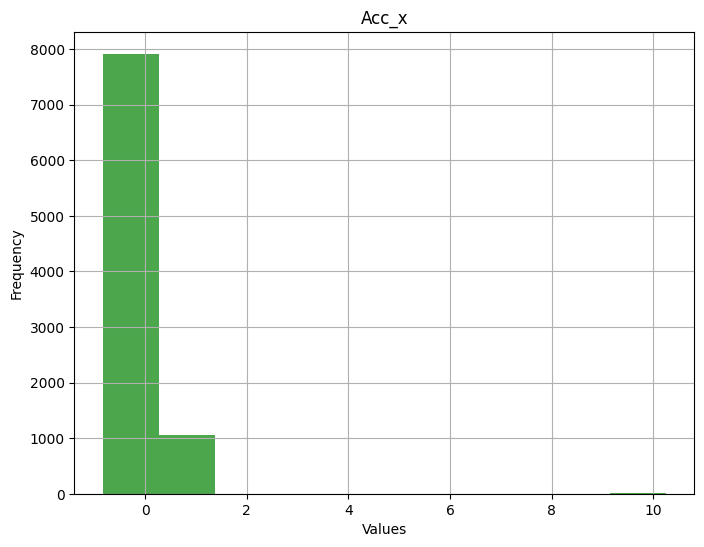

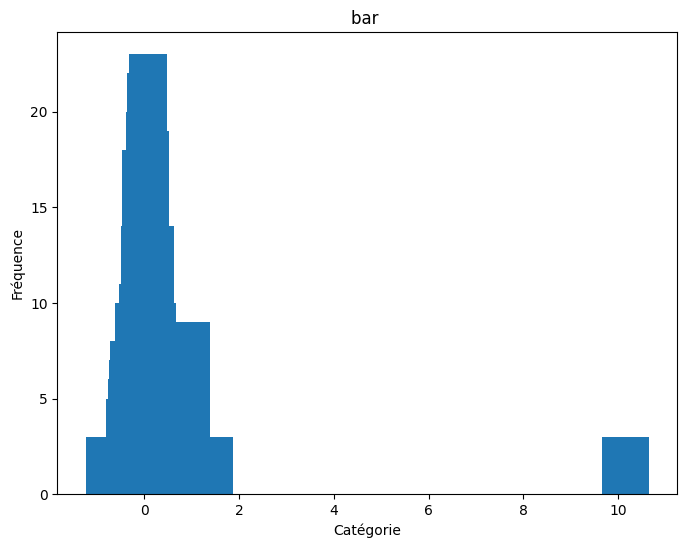

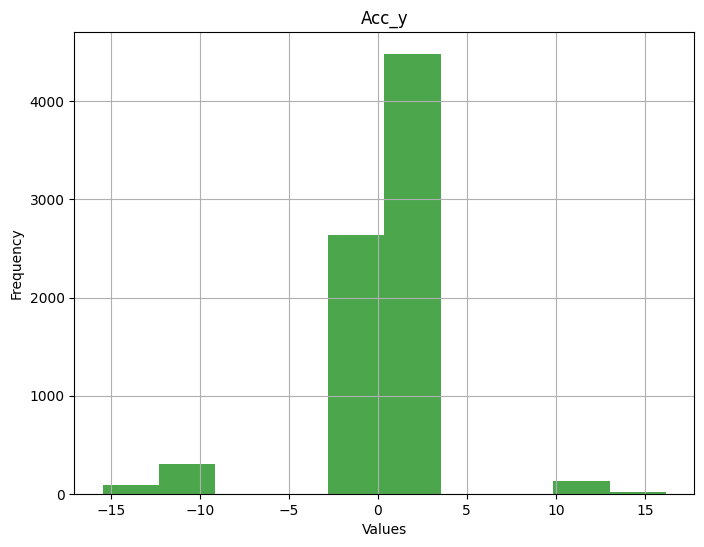

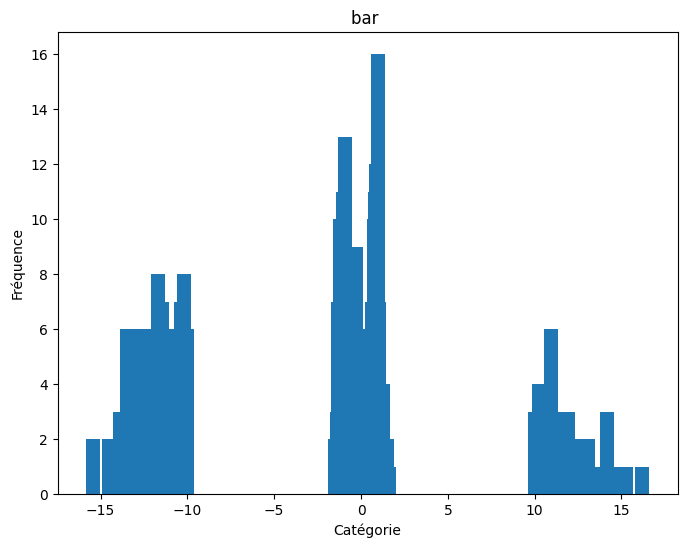

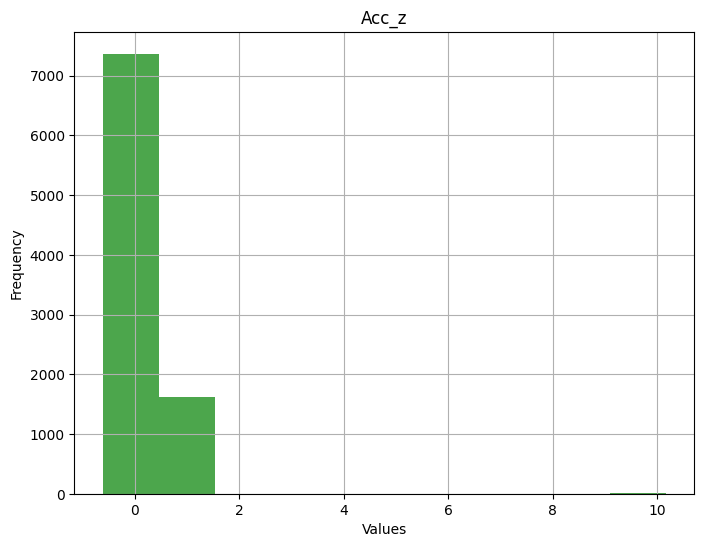

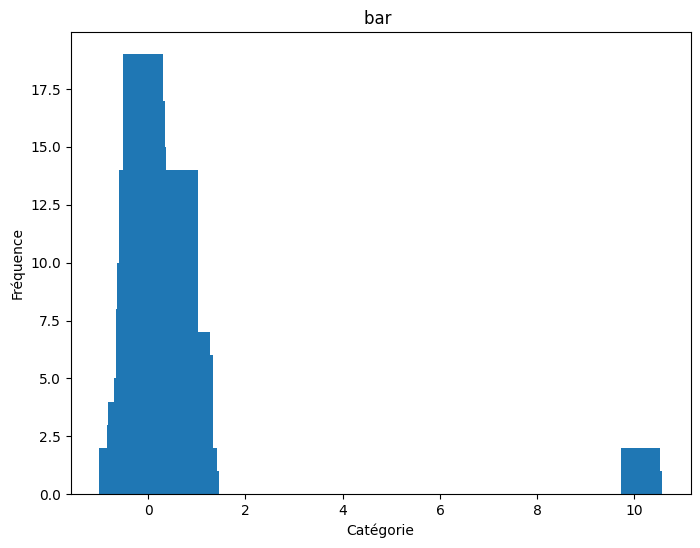

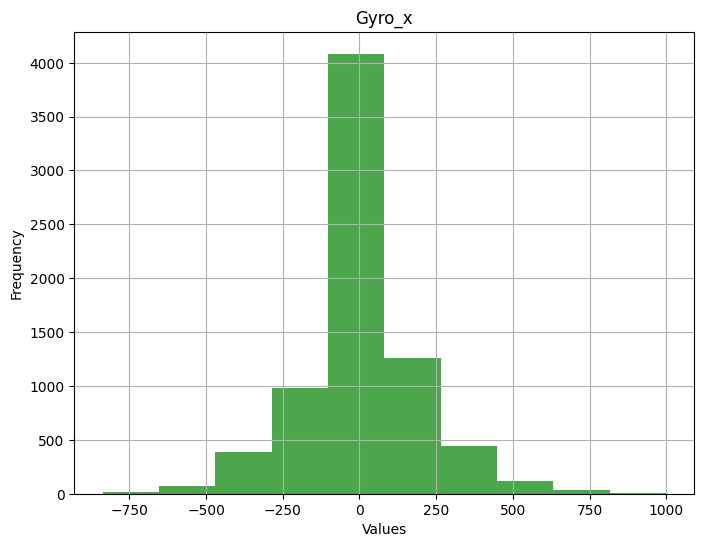

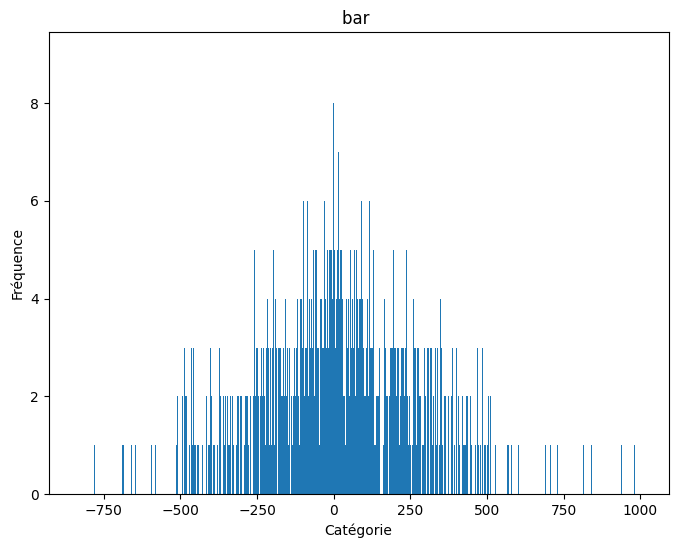

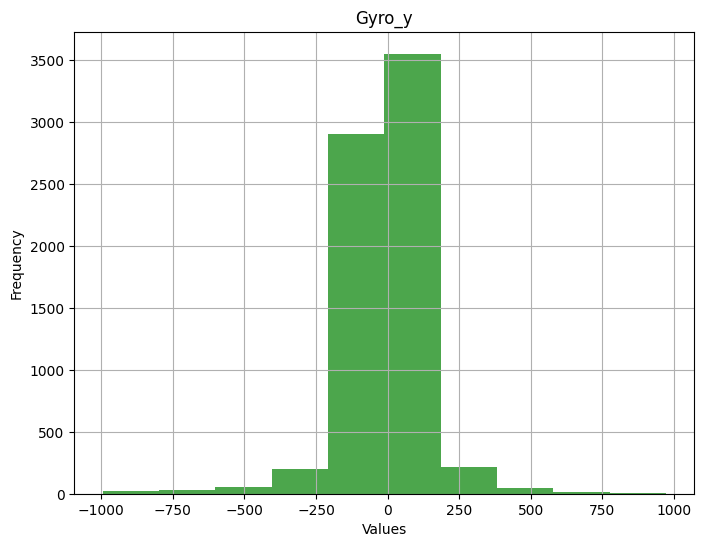

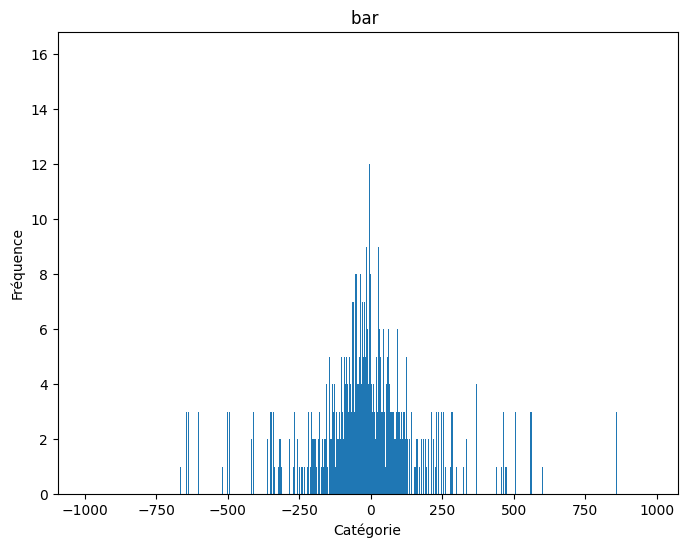

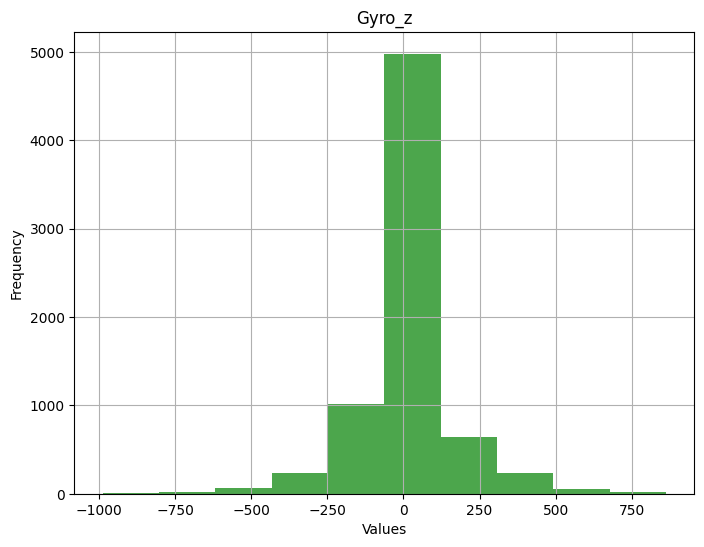

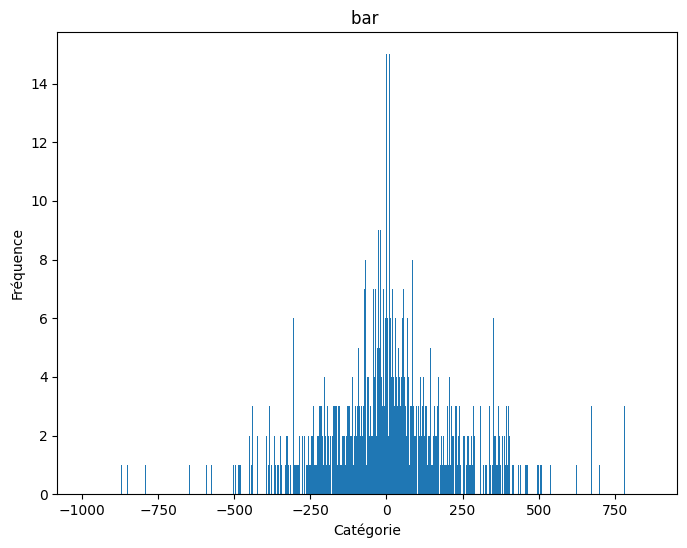

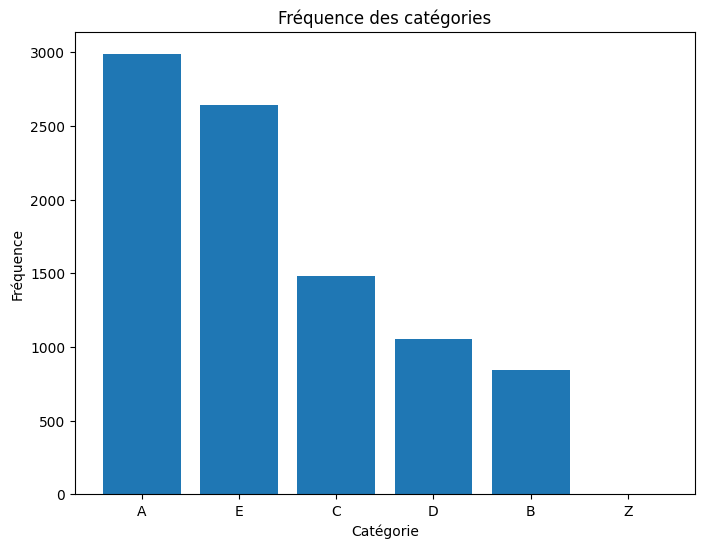

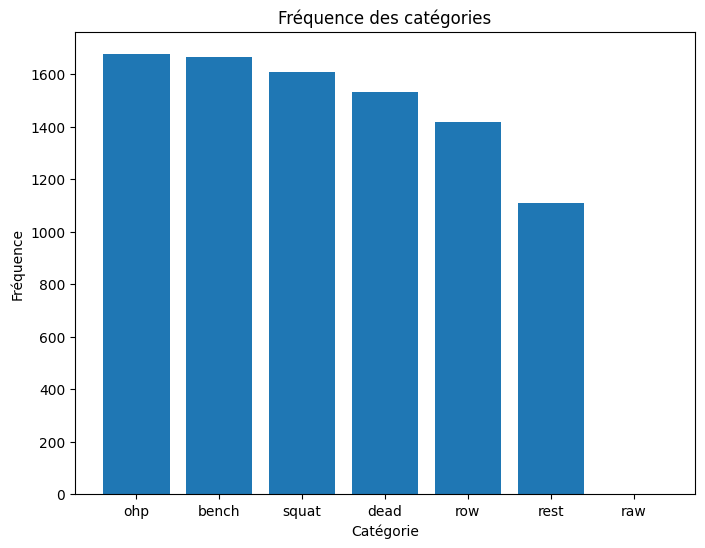

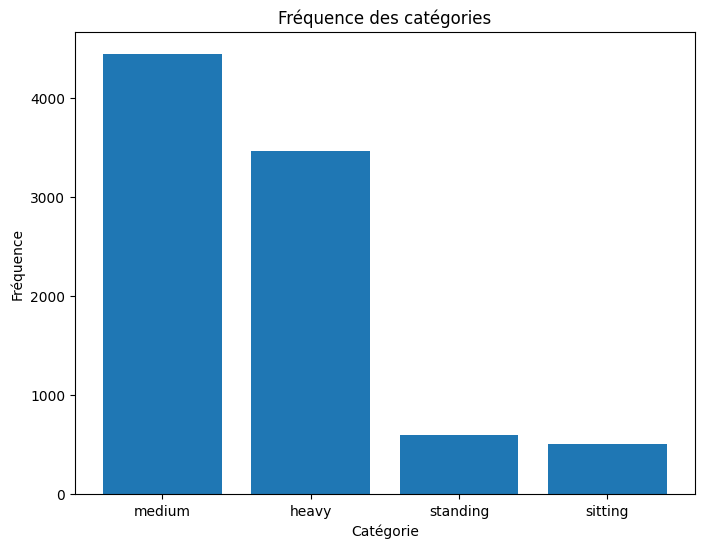

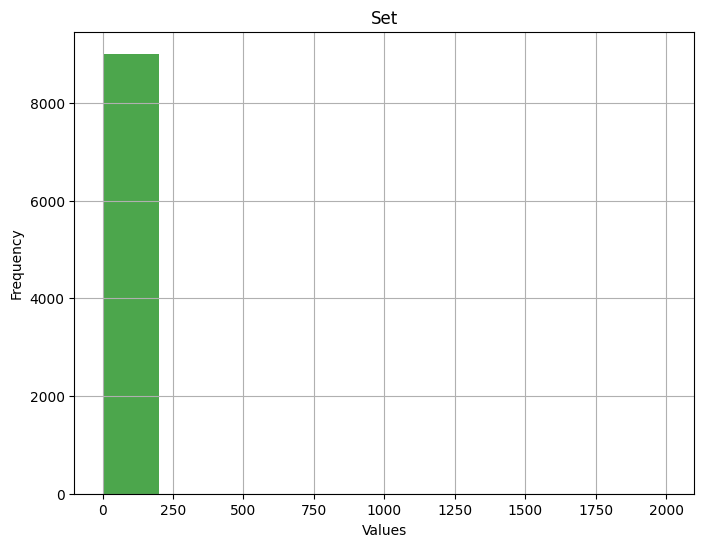

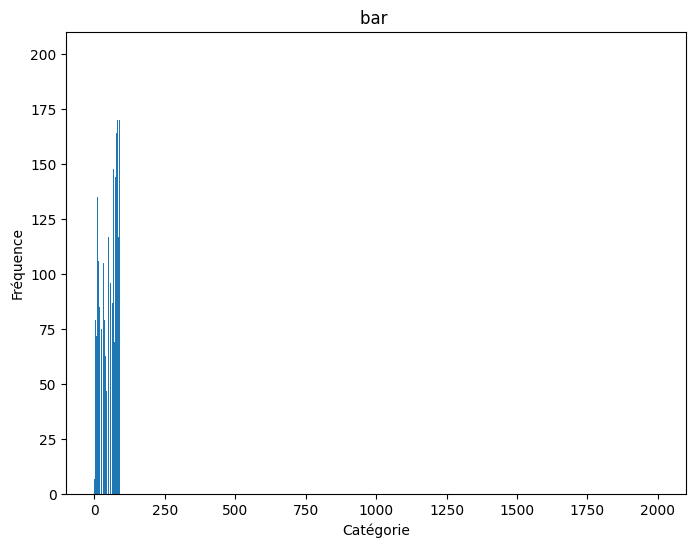

In [20]:

for i in range(len(data.columns)):

 histogram_Bar_chart(data.iloc[1:,i+1], bins=10, xlabel='Values', ylabel='Frequency', title=data.columns[i+1])
 if i==9 :
   break


3-Write a function to generate a box plot for an attribute

 with outliers

In [21]:

def box_plot(data,t):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, color='cyan')
    plt.title(t)
    plt.grid(True)
    plt.show()

with outliers


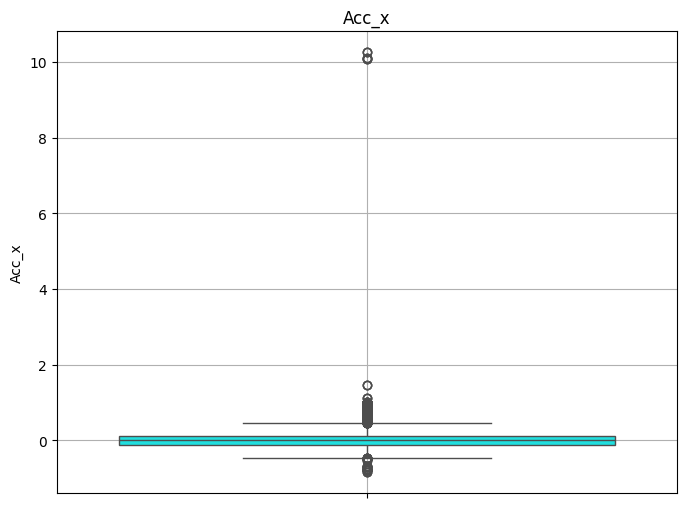

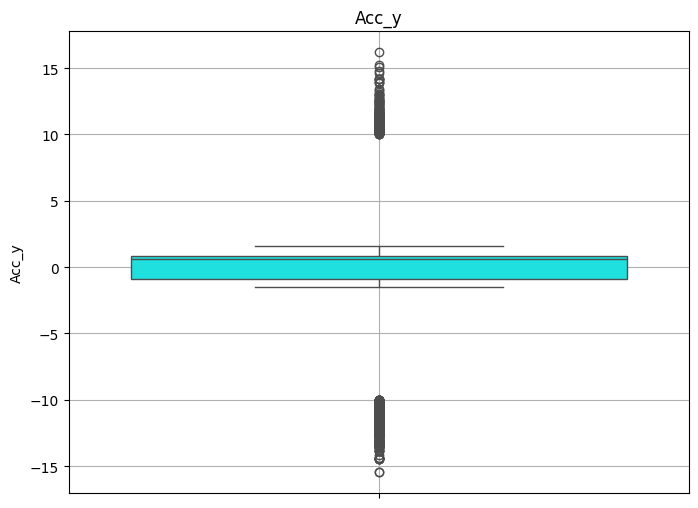

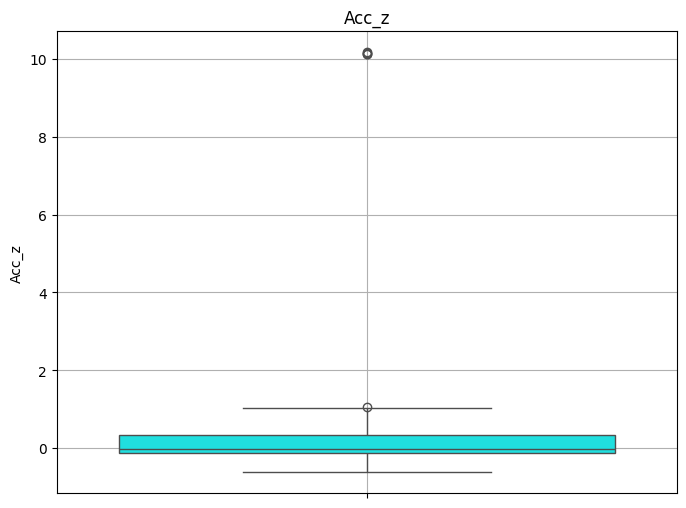

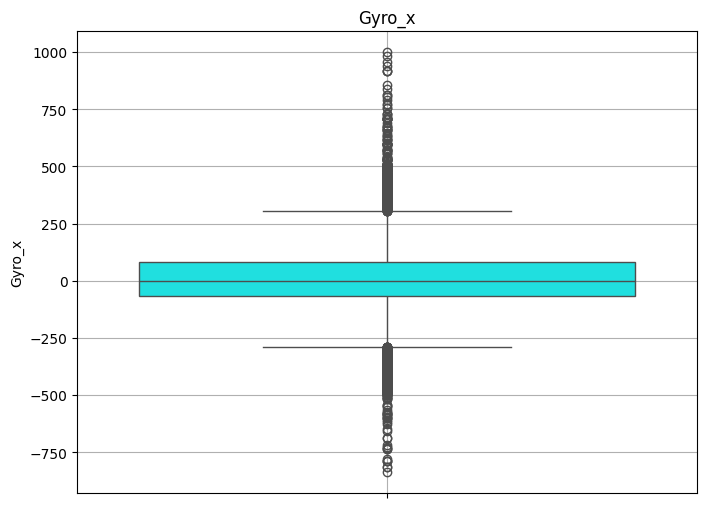

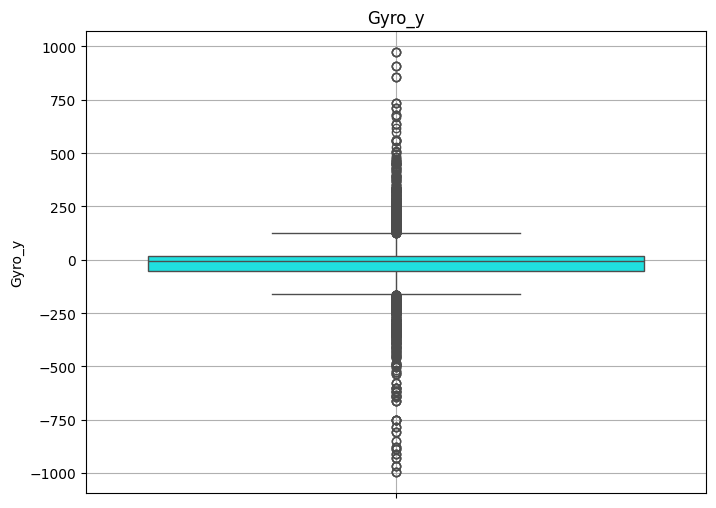

In [22]:
print( 'with outliers')
for i in range(len(data.columns)):
   box_plot(data.iloc[1:,i+1],data.columns[i+1])
   if i==4:
      break

 without  outliers

In [23]:
def box_plot_no_outliers(data,t ):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, color='cyan', showfliers=False)
    plt.title(t)
    plt.grid(True)
    plt.show()


without outliers


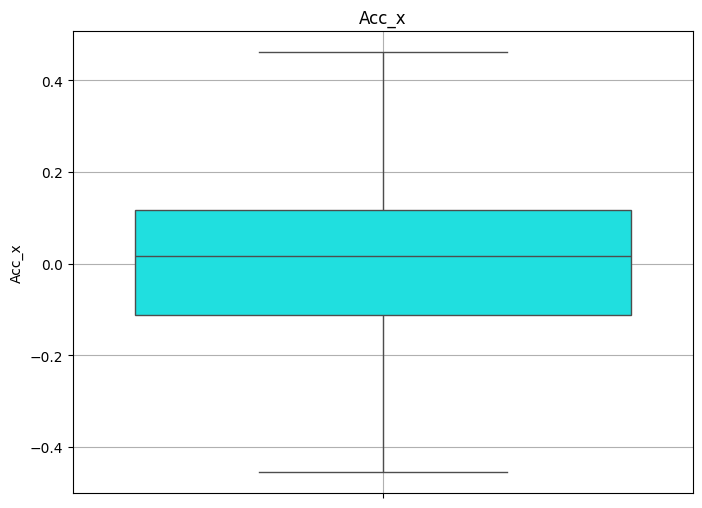

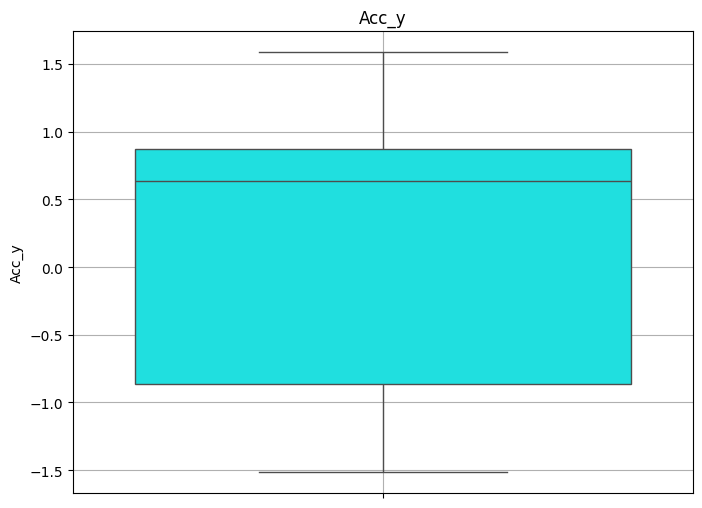

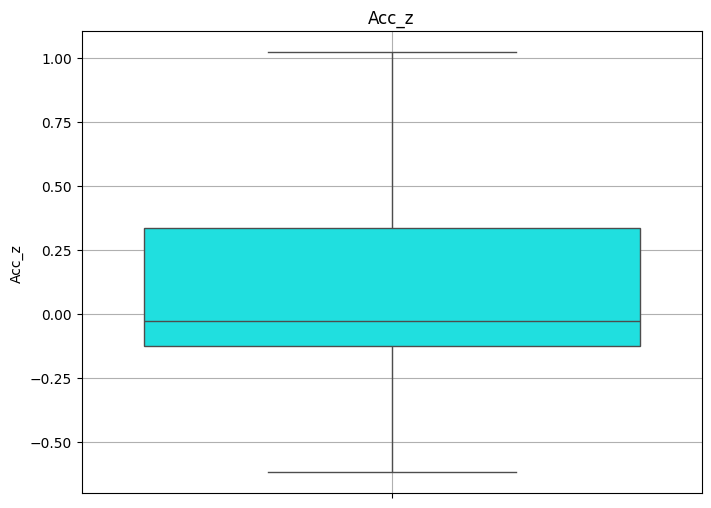

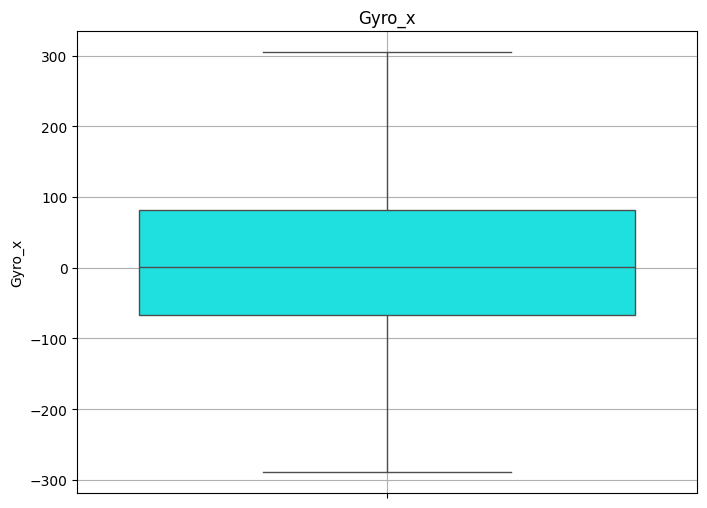

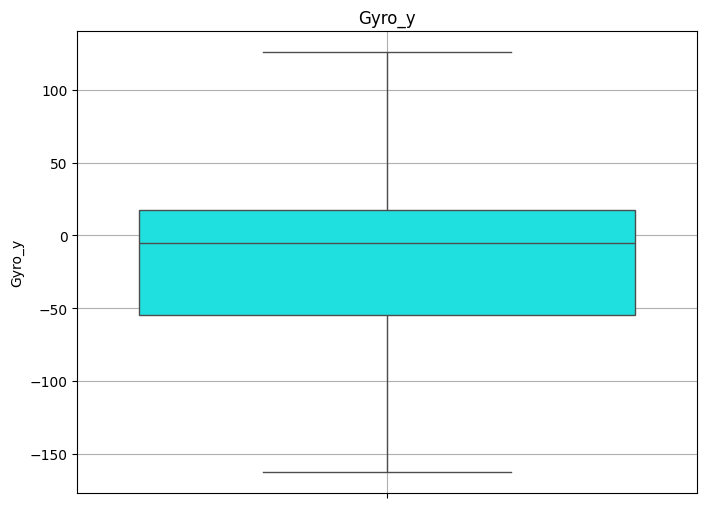

In [24]:
print( 'without outliers')
for i in range(len(data.columns)):
 box_plot_no_outliers(data.iloc[1:,i+1],data.columns[i+1])
 if i==4:
    break

### TP3:



1- Write a function to discretize the values of the "DatasetExos.csv" using Method 2
(Equal-width intervals).

 Use Huntsberger's formula to calculate the number of intervals
K=1+(10/3)*log10(n).

2- Replace the discretized values with the average of the corresponding interval.


In [25]:


import pandas as pd
import numpy as np
import math

def discretize_equal_width_with_averages(data):
    for column_name in data.select_dtypes(include=[np.number]).columns:
        print(f"Processing column: {column_name}")

        
        n = len(data[column_name])
        
        k = int(1 + (10 / 3) * math.log10(n))
        
        min_val = data[column_name].min()
        max_val = data[column_name].max()
        
        width = (max_val - min_val) / k
        
        intervale = [min_val + i * width for i in range(k + 1)]
        
        for i in range(k):
            print(f"Interval: [{intervale[i]:.2f}, {intervale[i+1]:.2f})")
        
        interval_col = 'Interval_' + column_name
        data[interval_col] = pd.cut(data[column_name], bins=intervale, include_lowest=True)
        print(data)
        
        interval_means = data.groupby(interval_col)[column_name].mean()
        data[column_name] = data[interval_col].map(interval_means)
        
        data = data.drop(columns=[interval_col])
    
    return data



discretized_data = discretize_equal_width_with_averages(data)

print("Discretized DataFrame:\n", discretized_data)


Processing column: Acc_x
Interval: [-0.84, -0.05)
Interval: [-0.05, 0.75)
Interval: [0.75, 1.54)
Interval: [1.54, 2.33)
Interval: [2.33, 3.12)
Interval: [3.12, 3.92)
Interval: [3.92, 4.71)
Interval: [4.71, 5.50)
Interval: [5.50, 6.29)
Interval: [6.29, 7.09)
Interval: [7.09, 7.88)
Interval: [7.88, 8.67)
Interval: [8.67, 9.46)
Interval: [9.46, 10.25)
                     ep (ms)     Acc_x      Acc_y     Acc_z   Gyro_x   Gyro_y  \
0    2019-01-11 15:08:05.200  0.013500   0.977000 -0.071000      NaN      NaN   
1    2019-01-11 15:08:05.400 -0.001500   0.970500 -0.079500 -16.8260  -0.8904   
2    2019-01-11 15:08:05.600  0.001333   0.971667 -0.064333      NaN  -0.2560   
3    2019-01-11 15:08:05.800 -0.024000   0.957000 -0.073500   8.0610 -45.2440   
4    2019-01-11 15:08:06.000 -0.028000   0.957667 -0.115000   2.4390 -15.4860   
...                      ...       ...        ...       ...      ...      ...   
9004 2019-01-20 17:33:27.000 -0.048000 -10.415000 -0.076500  14.1460 -56.2180   
9

C:\Users\belou\AppData\Local\Temp\ipykernel_10852\2332093853.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_means = data.groupby(interval_col)[column_name].mean()
C:\Users\belou\AppData\Local\Temp\ipykernel_10852\2332093853.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_means = data.groupby(interval_col)[column_name].mean()
C:\Users\belou\AppData\Local\Temp\ipykernel_10852\2332093853.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt t

3- Write a function to normalize the values of the "DatasetExos.csv" using Method 1. Use
Valuemin, new=0 and Valuemax, new=1.

In [26]:
def min_max_normalize(data):
   
    
    for column in data.select_dtypes(include=[np.number]).columns:
        min_val = data[column].min()
        max_val = data[column].max()
        newmin=0
        newmax=1
        data[column] =((data[column] - min_val)*(newmax-newmin)/ (max_val - min_val))+newmin
    
    return data

In [27]:
data=min_max_normalize(data)
print(data)

                     ep (ms)     Acc_x     Acc_y     Acc_z    Gyro_x  \
0    2019-01-11 15:08:05.200  0.031203  0.519015  0.050798       NaN   
1    2019-01-11 15:08:05.400  0.031203  0.518809  0.050011  0.446616   
2    2019-01-11 15:08:05.600  0.031203  0.518846  0.051416       NaN   
3    2019-01-11 15:08:05.800  0.031203  0.518383  0.050567  0.460166   
4    2019-01-11 15:08:06.000  0.031203  0.518404  0.046722  0.457105   
...                      ...       ...       ...       ...       ...   
9004 2019-01-20 17:33:27.000  0.000000  0.159191  0.050289  0.463480   
9005 2019-01-20 17:33:27.200  0.031203       NaN  0.052435  0.440704   
9006 2019-01-20 17:33:27.400  0.000000       NaN  0.049779       NaN   
9007 2019-01-20 17:33:27.600  0.031203       NaN  0.053238  0.455651   
9008 2019-01-20 17:33:27.800  0.031203  0.455496  0.051910  0.456375   

        Gyro_y    Gyro_z ID Exercise Category    Set     Interval_Acc_x  
0          NaN  0.534367  B    bench    heavy  0.015   (-0.04

### Tp4 :

D is said to be a relevant dataset for the Frequent Items extraction task, when it groups a set of
transactions T = {T1
, T2
, ... Tn} from a database where each transaction Ti

is a non-empty set of

elements with a number of Items from I , with I = {I1, I2, I3, ... Im}.
The data in a dataset is not always formatted adequately for Frequent Items extraction.
Therefore, it is sometimes necessary to detect what represents a Transaction and what
represents an Item in our Dataset. Therefore, the dataset will have to undergo changes in order
to group the Items of each transaction together before extracting any information from the
dataset.

1- Eliminate the first 7 columns and do the necessary preprocessing.

In [28]:
data=data.columns[7:10]


In [29]:
# import pandas as pd
# from sklearn.impute import KNNImputer



# # Step 1: Create a DataFrame
# df = pd.DataFrame(data)

# # Step 2: Rename values in the 'Exercise' column
# df['Exercise'] = df['Exercise'].replace({'reste': 'rest','raw': 'row'})

# # Step 3: Rename values in the 'Category' column
# df['Category'] = df['Category'].replace({ 'heav': 'heavy'})

# # Step 4: Impute missing values in the 'Category' column using KNN
# # For KNN imputation, we need to convert categorical data into numeric values
# # You can use `pd.get_dummies()` or similar encoding techniques.
# df_numeric = pd.get_dummies(df, columns=['Exercise', 'Category'], drop_first=True)

# # Initialize the KNN imputer
# imputer = KNNImputer(n_neighbors=3)

# # Impute the missing values
# df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# # Reverse the encoding for 'Category' column
# df_imputed['Category'] = df_imputed[['Category_row', 'Category_heavy']].idxmax(axis=1).replace({'Category_row': 'row', 'Category_heavy': 'heavy'})

# # View the final processed DataFrame
# print(df_imputed[['ID', 'Exercise', 'Category']])
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample dataset


# Convert to DataFrame
df = pd.DataFrame(data)

# Step 1: Rename values in the 'Exercise' and 'Category' columns
df['Exercise'] = df['Exercise'].replace({'reste': 'rest','raw': 'row', })
df['Category'] = df['Category'].replace({ 'heav': 'heavy'})

# Step 2: Encode categorical variables using label encoding
df['Exercise'] = df['Exercise'].astype('category')
df['Category'] = df['Category'].astype('category')

# Step 3: Split data into features and target
X = df[['Exercise']]  # Features
y = df['Category']  # Target

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train CatBoost model
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, cat_features=[0], verbose=0)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Output predictions
print("Predicted Categories:", y_pred)


KeyError: 'Exercise'

2- Study the dataset and deduce what are the Transactions and Items.

3- Give the number of Transactions and the number of Items in this dataset.

4- Build a dataset “DatasetExos_2” from the dataset to obtain the correct transactional format
necessary for the extraction of Frequent Items.